# Scikit-learn
- a free software machine learning library
- various classification, regression and clustering algorithms
- built on NumPy, SciPy, and matplotlib

In Scikit-learn classifiers are Python objects. They are trained and evaluated using methods implemented by all classifier objects.

We start by importing a number of libraries and modules that we will be using in this class

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Tools for scaling data, PCA, and standard datasets
from sklearn import preprocessing, decomposition, datasets

# Tools for tracking learning curves and perform cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve

# The k-NN learning algorithm
from sklearn.neighbors import KNeighborsClassifier as kNN

We now load in memory the *Breast Cancer Wisconsin (Diagnostic) Data Set*, a dataset for binary classification. The labels are `M` (malignant cancer) and `B` (benign cancer).

In [2]:
cancer = pd.read_csv("../Datasets/cancer.csv")
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

By inspecting the dataset we note that the first column (`id`) and the last column can be dropped.

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Since the last column contains all `Nan`, and there are not other `Nan` values in the dataset, we can delete it using the `dropna()` method invoked over the columns. This deletes any column that contains at least a `Nan` value.

In [4]:
cancer = cancer.dropna(axis='columns')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next, we create the set of instances by dropping the column `id` and by dropping the column `diagnosis` containing the labels. We do this using the method `drop()`.

In [5]:
X = cancer.drop(columns=['id', 'diagnosis']).values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
X.shape

(569, 30)

Finally, we replace the categorical labels `B` and `M` with numerical labels `0` and `1`.

In [7]:
str_to_int = {'B' : 0, 'M' : 1}
cancer['diagnosis'] = cancer['diagnosis'].map(str_to_int)
np.unique(cancer['diagnosis'])

array([0, 1])

This allows us to use the new values in the column `diagnoses` as vector of labels.

In [8]:
y = cancer['diagnosis'].values

Using the Numpy function `unique()` with the flag `return_counts` set, we can see the number of examples in each class.

In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([357, 212]))

Our next step is to randomly split the dataset in training and test sets. Since the dataset is relatively small (569 points), we leave 40% of the data for testing. The `random_state` variable is used a seed (we choose 42 just as any other value) for the random number generator in case we want to repeat the experiment using the same random bits. The flag `stratify` creates a split with the same proportion of classes in the train and test sets (especially useful when datasets are unbalanced).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

We are now ready to train a classifier for this dataset. We create a $1$-NN classifier object by invoking the function `kNN(n_neighbors=1)`, where `kNN()` is the alias we created when we imported the module for `KNeighborsClassifier()`. The object is assigned to the variable `knn`.

In [11]:
knn = kNN(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

Then we train the 1-NN classifier by invoking the method `fit()` with training points and training labels as arguments

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Finally, we invoke the method `score()` to evaluate the accuracy of the trained model on both the training and the test set.

In [13]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.9166666666666666)

As expected, the training accuracy is 1 (i.e., zero training error) while the testing accuracy is way below.

We perform a second experiment on the same random split this time using 3-NN.

In [14]:
knn = kNN(n_neighbors=3) # 3-NN
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9560117302052786, 0.9385964912280702)

Predictably, the training accuracy went down (by about 5%), while the test accuracy is now pretty close to the training accuracy.

Next, we use the function `learning_curve()` to inspect the evolution of training and test performance of $7$-NN for increasing sizes of the training set.

For each value of the training set size, a 5-fold stratified cross-validation is performed to estimate the risk.

In [15]:
sizes = range(100, 401, 50)
train_size, train_score, val_score = learning_curve(kNN(n_neighbors=7), X, y, train_sizes=sizes, cv=5)

`val_score` is a matrix whose each row contains the accuracy on the $5$ folds of cross validation for a given value of training size

In [16]:
val_score

array([[0.86956522, 0.92173913, 0.91150442, 0.85840708, 0.84955752],
       [0.87826087, 0.92173913, 0.92920354, 0.92920354, 0.90265487],
       [0.90434783, 0.92173913, 0.9380531 , 0.92920354, 0.92035398],
       [0.89565217, 0.93043478, 0.9380531 , 0.92920354, 0.92920354],
       [0.86956522, 0.93913043, 0.92920354, 0.9380531 , 0.92920354],
       [0.86956522, 0.93913043, 0.94690265, 0.9380531 , 0.92920354],
       [0.87826087, 0.93913043, 0.94690265, 0.94690265, 0.92920354]])

The training and cross-validation scores are plotted as follows.

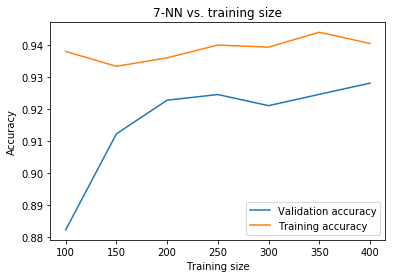

In [17]:
plt.title('7-NN vs. training size')
plt.plot(train_size, np.mean(val_score, 1), label='Validation accuracy')
plt.plot(train_size, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

Now we want to plot the training and test performance in terms of the parameter $k$ of $k$-NN. We start by creating a list of values of $k$ from 1 to 200 with steps of 20.

Then, we use the function `validation_curve()` to create a matrix of training scores and a matrix of test scores, where, as before, rows are indexed by the values of $k$ used to generate the scores, and columns report the per-fold performance in a cross-validation experiment.

In [18]:
neighbors = range(1,200,20)
train_score, val_score = validation_curve(kNN(), X, y, 'n_neighbors', neighbors, cv=5)
train_score, val_score

(array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.94493392, 0.92290749, 0.92982456, 0.92763158, 0.92763158],
        [0.92951542, 0.90969163, 0.91885965, 0.91885965, 0.92105263],
        [0.92290749, 0.91409692, 0.91447368, 0.91008772, 0.91447368],
        [0.92951542, 0.90748899, 0.90789474, 0.9122807 , 0.90350877],
        [0.92511013, 0.90748899, 0.90570175, 0.90131579, 0.90570175],
        [0.90748899, 0.90088106, 0.89473684, 0.89692982, 0.89912281],
        [0.9030837 , 0.89867841, 0.88815789, 0.89035088, 0.89692982],
        [0.89647577, 0.89427313, 0.88815789, 0.88377193, 0.89473684],
        [0.88325991, 0.88325991, 0.875     , 0.875     , 0.88596491]]),
 array([[0.86086957, 0.93043478, 0.91150442, 0.91150442, 0.91150442],
        [0.86956522, 0.92173913, 0.9380531 , 0.95575221, 0.96460177],
        [0.86086957, 0.89565217, 0.92920354, 0.95575221, 0.95575221],
        [0.85217391, 0.88695652, 0.92920354, 0.9380531 , 0.9380531 ],
        [0.8521739

Plotting the results clearly reveals overfitting and underfitting regions of the parameter $k$, with the best value at about $k=25$.

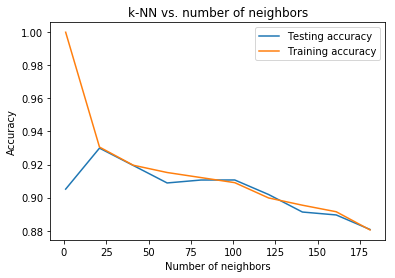

In [19]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, np.mean(val_score, 1), label='Testing accuracy')
plt.plot(neighbors, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We move on to a different dataset: the *Pima Indians Diabetes Database*. The goal of this dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Hence, the are only two labels (binary classification).

In [20]:
pima = pd.read_csv("Datasets/diabetes.csv")
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The `Outcome` column contains the labels. We use this to construct our sets of training points and training labels.

In [22]:
X = pima.drop(columns='Outcome').values
y = pima['Outcome'].values

As before, we count the proportions of positive and negative labels.

In [23]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 268]))

Then we split the dataset in training set (60%) and test set (40%) using stratification.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

The validation curve is plotted using the same range of values for $k$ as before.

In [25]:
neighbors = range(1,200,20)
train_score, val_score = validation_curve(kNN(), X, y, 'n_neighbors', neighbors, cv=5)

Once more, the regions of underfitting and overfitting for the parameter $k$ are clearly seen in the plot.

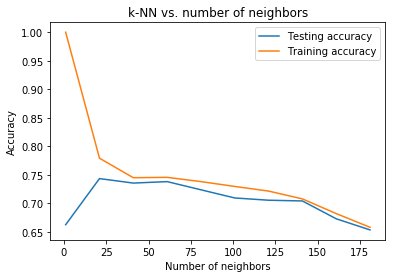

In [26]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, np.mean(val_score, 1), label='Testing accuracy')
plt.plot(neighbors, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Cross-validation to evaluate performance of a given algorithm
The function `cross_val_score()` performs cross validation to estimate the risk of the classifier output by a given algorithm.

Here is an example using $5$-fold cross-validation on the entire dataset to evaluate the performance of $21$-NN.

In [27]:
knn = kNN(n_neighbors=21)
scores = cross_val_score(knn, X, y, cv=5)
scores, scores.mean()

(array([0.75324675, 0.67532468, 0.73376623, 0.81045752, 0.74509804]),
 0.7435786435786437)

### Grid-search to find best value of parameter for the learning algorithm
We can use the function `GridSearch()` to look for the best parameter of an algorithm using the entire dataset.
- Repeat 5-fold cross-validation on the entire dataset for each value of the parameter in the grid
- Select the parameter with the best cross-validated score

In [28]:
k_grid = {'n_neighbors': range(1,50,4)}
learner = GridSearchCV(estimator=kNN(), param_grid=k_grid, cv=5, return_train_score=True)
learner.fit(X, y)
learner.best_params_, learner.best_score_ # vars containing the best parameter value and its corresponding cv score

({'n_neighbors': 13}, 0.7552083333333334)

The algorithm with the best parameter, $13$-NN, is available in the variable `learner.best_estimator_`, that is `learner.best_estimator_ = kNN(n_neighbors=13)`

We repeat the evaluation of this algorithm using 5-fold cross-validation. Note that the cv score is slightly different, possibly due to the fact that the implementation of cross-validation in `cross_val_score()` is slightly different from that of `GridSearchCV()`.

In [29]:
model = learner.best_estimator_
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.7552584670231729

### Nested cross-validation to evaluate performance of a learning algorithm with parameters to tune
We saw that cross-validation allows us to use the data for choosing a good value of the parameter. However, we are still left with the problem of estimating the risk of the classifier generated by the algorithm. Nested cross-validation provides a way of estimating the risk of a classifier generated by an algorithm whose parameters are tuned using cross-validation on the training set.

In the following example, we:
- Run 5-fold cross-validation on the entire dataset
- On the training part of each fold, run *internal* 5-fold cross-validation to find the best value of the parameter
- Re-train the model on the training part of the outer fold using the optimized parameter
- Test the model on the testing part of the outer fold.

In [30]:
k_grid = {'n_neighbors': [1, 7, 13, 17, 21]}
learner = GridSearchCV(estimator=kNN(), param_grid=k_grid, cv=5) # internal C-V
scores = cross_val_score(learner, X, y, cv=5) # external C-V
scores, scores.mean()

(array([0.75974026, 0.70779221, 0.75974026, 0.82352941, 0.7254902 ]),
 0.7552584670231729)

## Preprocessing the dataset
Many learning algorithms may work better when the training set is rescaled in certain ways. Note that, in order to avoid contributing to overfitting, these rescalings should not depend on the training labels.

We illustrate the most popular rescaling technique on the cancer dataset.

In [31]:
X = cancer.drop(columns=['id', 'diagnosis']).values
y = cancer['diagnosis'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

The `StandardScaler()` function standardizes the values of each feature $i$. If $x_1(i),\ldots,x_m(i)$ are the values of the $i$-th feature in the dataset $x(1),\dots,x(m)$, then `StandardScaler()` replaces each value $x_t(i)$ with
$$x_t(i)' = \frac{x_t(i)-\mu_i}{\sigma_i}$$
where $$\mu_i = \frac{1}{m}\sum_{t=1}^m x_t(i) \;\;\;\textrm{and}\;\;\; \sigma_i^2 = \frac{1}{m}\sum_{t=1}^m \bigl(x_t(i)-\mu_i\big)^2$$

Note that `standard_scaler.fit_transform()` is used to compute $\mu_i$ and $\sigma_i$ for each feature $i$ on the training data and then to rescale the training data. The testing data are rescaled using the parameters computed on the training data. Allowing the learner to compute the rescaling parameters using the testing data would imply that the test set is made available (without labels) before the classifier is generated. This is typically not allowed in the statistical learning model.

In [33]:
standard_scaler = preprocessing.StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

Next, we compute the test set performance with and without rescaling for different values of $k$.

In [34]:
neighbors = range(1,8)
test_scores = []
test_scores_standard = []

for k in neighbors:
    knn = kNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    knn.fit(X_train_standard, y_train)
    test_scores_standard.append(knn.score(X_test_standard, y_test))

Plotting the perfomance in both cases shows the benefits of rescaling.

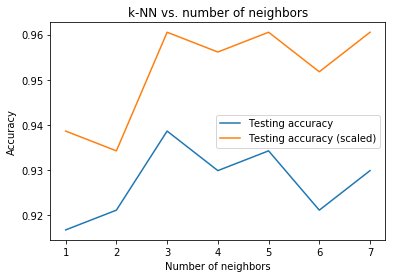

In [35]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, test_scores, label='Testing accuracy')
plt.plot(neighbors, test_scores_standard, label='Testing accuracy (scaled)')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We now repeat the same exercise use the Pima Indians dataset.

In [36]:
X = pima.drop(columns='Outcome').values
y = pima['Outcome'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
standard_scaler = preprocessing.StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [37]:
neighbors = range(1,100,20)
test_scores = []
test_scores_standard = []

for k in neighbors:
    knn = kNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    knn.fit(X_train_standard, y_train)
    test_scores_standard.append(knn.score(X_test_standard, y_test))

Also in this case, we see that rescaling helps boost the test accuracy.

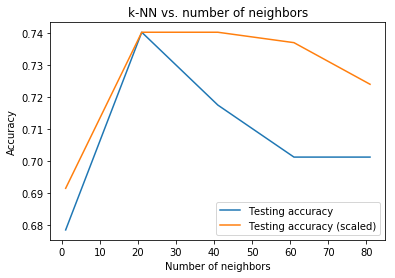

In [38]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, test_scores, label='Testing accuracy')
plt.plot(neighbors, test_scores_standard, label='Testing accuracy (scaled)')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We finish by showing a graphical representation of the $k$-NN classifier.

We do this by
- loading the IRIS dataset using the shortcut provided by the Scikit-learn module `datasets`
- projecting the dataset onto the two principal dimension via Principal Component Analysis.

In [39]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

A scatter plot of the projected data reveals that $k$-NN is going to have an easy time classifying this dataset...

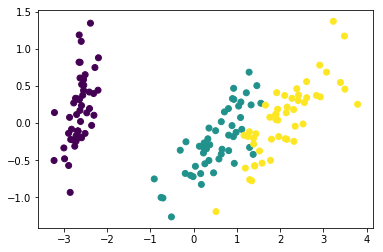

In [40]:
plt.scatter(X[:,0], X[:,1], c=y)

The next code cell (adapted from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html) allows us to visualize the decision surface of the $k$-NN classifier. Each colored region is the the set of data points that are assigned the same classification by $k$-NN.

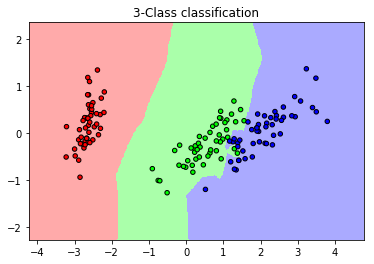

In [41]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = kNN(n_neighbors=1)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification")

plt.show()

We repeat the same exercise using the Pima Indians dataset. Note that the job of $k$-NN is harder here.

In [42]:
X = pima.drop(columns='Outcome').values
y = pima['Outcome'].values

standard_scaler = preprocessing.StandardScaler()
X = standard_scaler.fit_transform(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

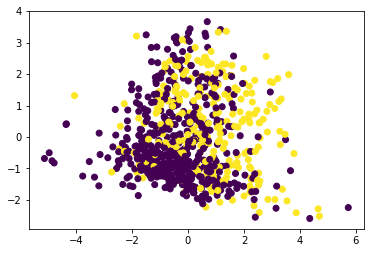

In [43]:
plt.scatter(X[:,0], X[:,1], c=y)

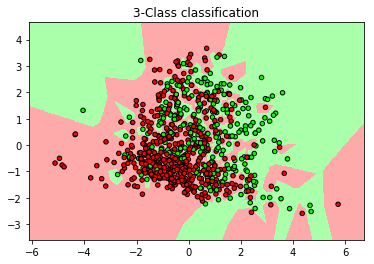

In [44]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = kNN(n_neighbors=1)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification")

plt.show()